In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

DataSet

In [2]:
data=pd.read_csv("D:\\Data-Core\\CAPSTONE PROJECT 1\\Predict Potential Spammers\\fiverr_data.csv")

In [3]:
print("Dataset:\n", data.head())

Dataset:
    label  user_id     X1   X2  X3  X4  X5  X6  X7  X8  ...  X42  X43  X44  \
0      0        1  20972   14  13   3  11   1   2  15  ...    0    0    0   
1      0        2   7362  213  71   3  11   1   2  15  ...    0    0    0   
2      0        3  21216  215  71   3  11   1   2  15  ...    0    0    0   
3      0        4   2261  212  71   2   8   1   2  15  ...    0    0    0   
4      0        5   4543  213  71   2   8   1   2  15  ...    0    0    0   

   X45  X46  X47  X48  X49  X50  X51  
0    0    0    0    0    0    1    0  
1    0    0    0    0    0    0    0  
2    0    0    0    0    0    0    0  
3    0    0    0    0    1    0    0  
4    0    0    0    0    0    0    0  

[5 rows x 53 columns]


In [4]:
print("Dataset Shape:\n", data.shape)

Dataset Shape:
 (458798, 53)


In [5]:
print("Dataset Null-Value:\n", data.isnull().sum())

Dataset Null-Value:
 label      0
user_id    0
X1         0
X2         0
X3         0
X4         0
X5         0
X6         0
X7         0
X8         0
X9         0
X10        0
X11        0
X12        0
X13        6
X14        0
X15        0
X16        0
X17        0
X18        0
X19        0
X20        0
X21        0
X22        0
X23        0
X24        0
X25        0
X26        0
X27        0
X28        0
X29        0
X30        0
X31        0
X32        0
X33        0
X34        0
X35        0
X36        0
X37        0
X38        0
X39        0
X40        0
X41        0
X42        0
X43        0
X44        0
X45        0
X46        0
X47        0
X48        0
X49        0
X50        0
X51        0
dtype: int64


In [6]:
data_no_null= data.dropna()

In [7]:
print("Dataset Shape:\n", data_no_null.shape)

Dataset Shape:
 (458792, 53)


In [8]:
print("DataSet Data Types:\n", data.dtypes)

DataSet Data Types:
 label        int64
user_id      int64
X1           int64
X2           int64
X3           int64
X4           int64
X5           int64
X6           int64
X7           int64
X8           int64
X9           int64
X10          int64
X11          int64
X12          int64
X13        float64
X14          int64
X15          int64
X16          int64
X17          int64
X18          int64
X19          int64
X20          int64
X21          int64
X22          int64
X23          int64
X24          int64
X25          int64
X26          int64
X27          int64
X28          int64
X29          int64
X30          int64
X31          int64
X32          int64
X33          int64
X34          int64
X35          int64
X36          int64
X37          int64
X38          int64
X39          int64
X40          int64
X41          int64
X42          int64
X43          int64
X44          int64
X45          int64
X46          int64
X47          int64
X48          int64
X49          int64
X50       

In [9]:
corr_matrix= data_no_null.corr()
strong_corr= corr_matrix[(corr_matrix> 0.7)| (corr_matrix< -0.7)]

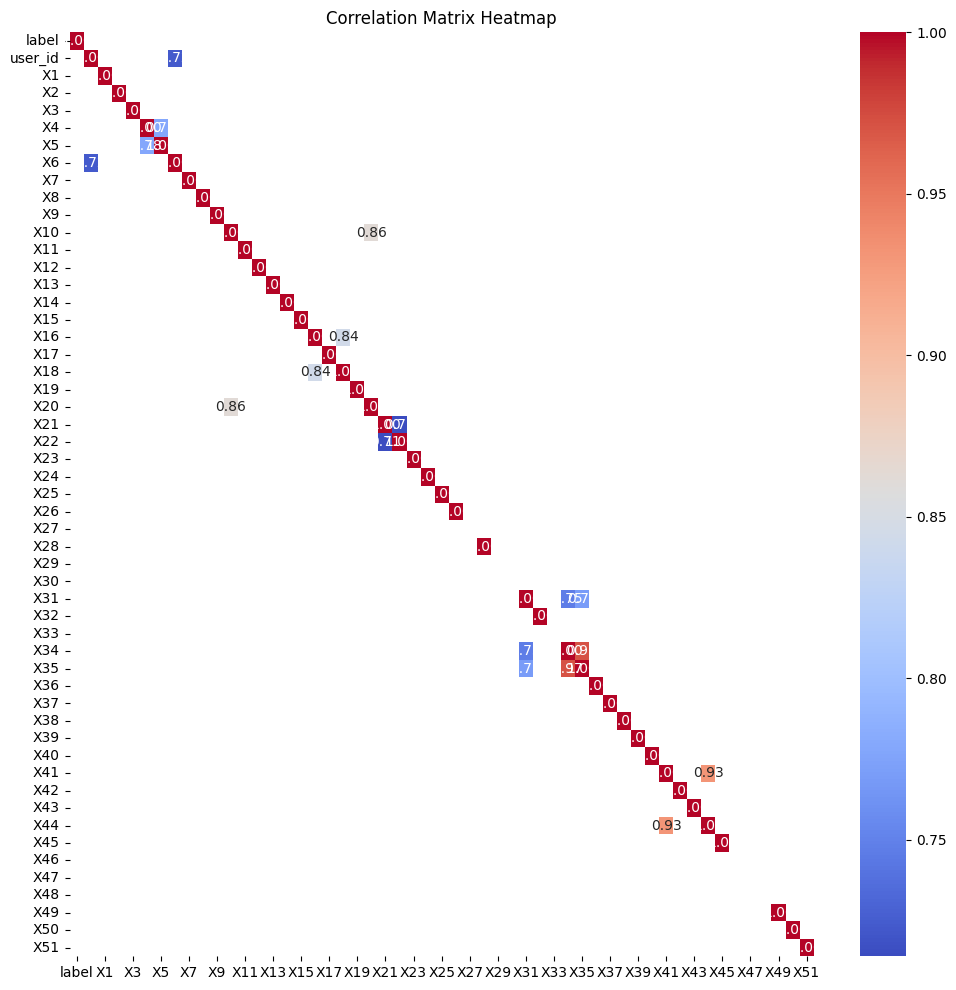

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(strong_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

Logistic Regression

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [12]:
x=data_no_null.drop(columns=['label','user_id'], axis=1)

In [13]:
y= data_no_null['label']

In [14]:
LogRe= LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced')

In [15]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
LogRe.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

In [16]:
y_pred= LogRe.predict(x_test)
print(y_pred)

[0 0 0 ... 0 1 0]


In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy= accuracy_score(y_test, y_pred)
print("Accuracy:\n", accuracy)

Accuracy:
 0.8531806144356412


In [19]:
import numpy as np

In [20]:
y_prob = LogRe.predict_proba(x_test)[:, 1]

In [21]:
threshold = 0.5
y_labels = ['Spam' if prob >= threshold else 'No Spam' for prob in y_prob]

x_test_labeled = x_test.copy()
x_test_labeled['Actual'] = y_test.values
x_test_labeled['Probability_of_Default'] = y_prob
x_test_labeled['Predicted_Label'] = y_labels

In [22]:
print(x_test_labeled.head())

           X1   X2  X3  X4  X5  X6  X7  X8  X9    X10  ...  X45  X46  X47  \
131325   6804   95  13   3  16   3   8  15  26  48955  ...    0    0    0   
37949   10159   78  13   3  17   3   2  15  16  48955  ...    0    0    0   
141754  10074   95  13   2   2   3   8  15  14  48955  ...    0    0    0   
194273  17456  213  13   3  16   3   3  15  14  48955  ...    0    0    0   
400547   5784   19  13   3  16   4   8  15  14  48955  ...    0    0    0   

        X48  X49  X50  X51  Actual  Probability_of_Default  Predicted_Label  
131325    0    0    1    0       0                0.090863          No Spam  
37949     0    1    0    0       0                0.038052          No Spam  
141754    0    0    1    0       0                0.211911          No Spam  
194273    0    0    1    0       0                0.174198          No Spam  
400547    0    0    1    0       0                0.424104          No Spam  

[5 rows x 54 columns]


In [23]:
print(x_test_labeled['Predicted_Label'].value_counts())

Predicted_Label
No Spam    76590
Spam       15169
Name: count, dtype: int64


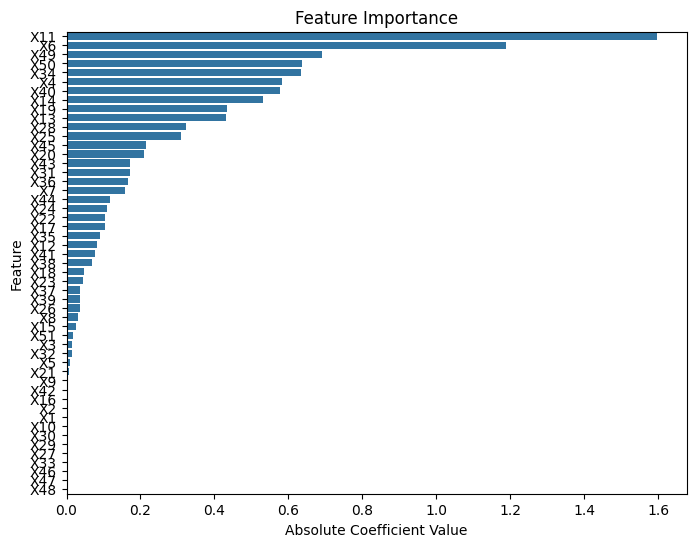

In [24]:
importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': LogRe.coef_[0]
})
importance['Abs_Coefficient'] = np.abs(importance['Coefficient'])
importance = importance.sort_values(by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Abs_Coefficient', y='Feature',data=importance)
plt.title('Feature Importance')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

Random Forest Classification

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rfc= RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, class_weight='balanced')

In [27]:
rfc.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [28]:
y_pred2= rfc.predict(x_test)
print(y_pred2)

[0 0 0 ... 0 1 0]


In [29]:
accuracy= accuracy_score(y_test, y_pred2)
print("Accuracy:\n", accuracy)

Accuracy:
 0.9856362863588313


In [30]:
y_prob2= rfc.predict_proba(x_test)[:, 1]

In [31]:
threshold = 0.5
y_labels2 = ['Spam' if prob >= threshold else 'No Spam' for prob in y_prob2]

x_test_labeled2 = x_test.copy()
x_test_labeled2['Actual'] = y_test.values
x_test_labeled2['Probability_of_Default'] = y_prob2
x_test_labeled2['Predicted_Label'] = y_labels2

In [32]:
print(x_test_labeled2['Predicted_Label'].value_counts())

Predicted_Label
No Spam    90124
Spam        1635
Name: count, dtype: int64


In [33]:
importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': rfc.feature_importances_
})
importance = importance.sort_values(by='Importance', ascending=False)

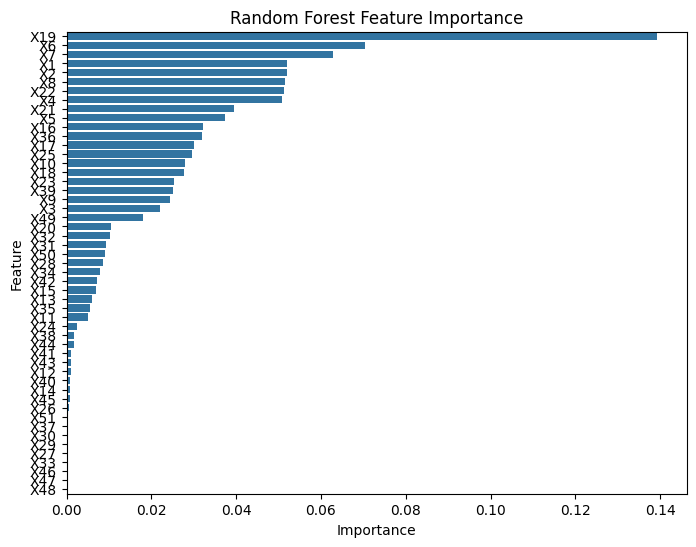

In [34]:
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title("Random Forest Feature Importance")
plt.show()

Hyper Parameter Tuning

In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
from sklearn.datasets import make_classification

In [38]:
x, y = make_classification(n_samples=1000, n_features=10, random_state=42)

In [39]:
gb = GradientBoostingClassifier(random_state=42)

In [40]:
param_grid= {
    'n_estimators': [50,100,200,300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'max_features': ['auto', 'sqrt', 'log2']}

In [41]:
random_search= RandomizedSearchCV(
    estimator= gb,
    param_distributions= param_grid,
    n_iter= 20,
    cv= 5,
    scoring= 'accuracy',
    verbose= 2,
    random_state=42,
    n_jobs= -1
)

In [42]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\anubh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\anubh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\anubh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\anubh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.p

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42, scoring='accuracy', verbose=2)

In [43]:
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}


In [44]:
best_model= random_search.best_estimator_

In [45]:
y_pred2= best_model.predict(x_test)

In [46]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8531806144356412


In [47]:
importance2 = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': best_model.feature_importances_
})
importance2 = importance.sort_values(by='Importance', ascending=False)

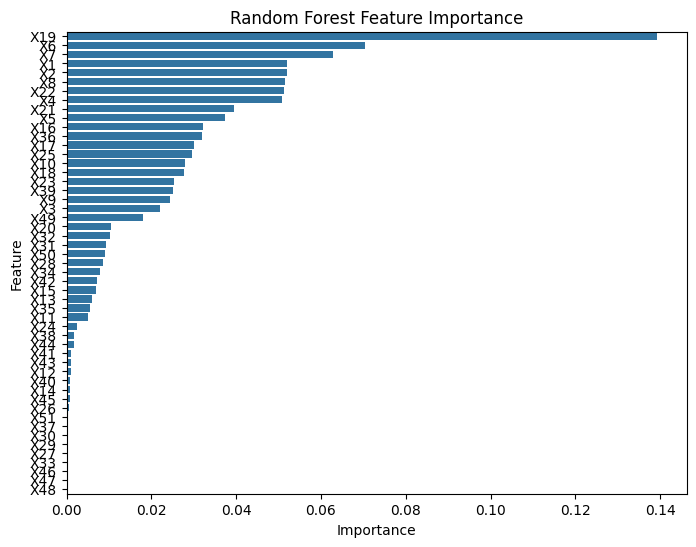

In [48]:
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title("Random Forest Feature Importance")
plt.show()